In [15]:
import numpy as np
import pandas as pd
from glob import glob
from reader import ParseNeware
import matplotlib.pyplot as plt 

In [16]:
f = '/home/mmemc/projects/expt/volt_curves_from_neware/RON_CYC_141764_Nw_c0_C3C3_46V_40C_200309_PES211_FM_47V_b54918_127.0.0.1_240213_7_7.txt'

In [17]:
nd = ParseNeware(f)

Found 79 cycles.
Found charge C-rates: ['C/20', 'C/3']
Found discharge C-rates: ['C/20', 'C/3']


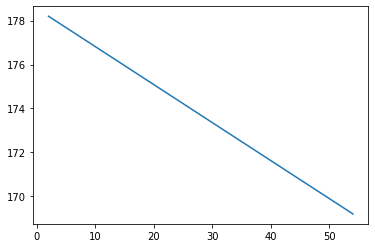

In [22]:
cyc_nums = nd.select_by_rate('C/20')
cycnums, dcap = nd.get_discap(cycnums=cyc_nums)
plt.plot(cycnums, dcap)

In [4]:
print(nd.cyc.columns)
#print(nd.cycunits)
print(nd.step.columns)
print(nd.rec.columns)
print(nd.recunits)

Index(['Cycle_ID', 'Cap_Chg', 'Cap_DChg', 'Specific_Capacity-Chg',
       'Specific_Capacity-Dchg', 'Chg/DChg_Efficiency', 'Engy_Chg',
       'Engy_DChg', 'REngy_Chg', 'REngy_Dchg', 'CC_Chg_Ratio', 'CC_Chg_Cap',
       'Plat_Cap', 'Plat_Capacity_Density', 'Plat_Cap_Efficiency', 'Plat_Time',
       'Capacity_Chg', 'Capacity_DChg', 'IR', 'Mid_value_Voltage',
       'Discharge_Fading_Ratio', 'Charge_Time', 'Discharge_Time', 'Charge_IR',
       'Discharge_IR', 'End_Temperature', 'Net_Cap_DChg', 'Net_Engy_DChg',
       'Energy_Efficiency'],
      dtype='object')
Index(['Cycle_ID', 'Step_ID', 'Step_Name', 'Step_Time', 'Capacity',
       'Capacity_Density', 'Energy', 'CmpEngergy', 'Capacitance',
       'Start_Voltage', 'End_Voltage', 'Start_Temperature', 'End_Temperature',
       'End_Capacity', 'Charge_Mid-Vol', 'Discharge_Mid-Vol', 'DCIR',
       'ChargeCap', 'DischargeCap', 'Engy_Chg', 'Engy_DChg',
       'Net_DischargeCap', 'Net_Engy_DChg', 'Raw_Step_ID'],
      dtype='object')
Index(['Cy

In [5]:
cycnum = 10  # cycle number to get
rec = nd.rec
cycle = rec.loc[rec['Cycle_ID'] == cycnum]
stepnums = cycle['Step_ID'].unique()    # gets step numbers for chg / dchg of cycle cycnum
print(stepnums)

chg = cycle.loc[cycle['Step_ID'] == stepnums[0]]   # charge data
Vchg = chg['Voltage'].values
Cchg = chg['Capacity'].values
print(np.shape(Vchg), np.shape(Cchg))

dchg = cycle.loc[cycle['Step_ID'] == stepnums[1]]    # discharge data
Vdchg = dchg['Voltage'].values
Cdchg = dchg['Capacity'].values
print(np.shape(Vdchg), np.shape(Cdchg))

[19 20]
(50,) (50,)
(48,) (48,)


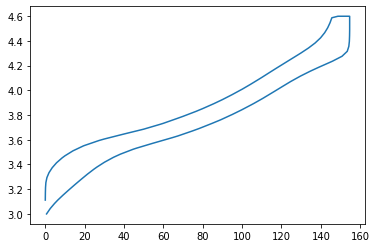

In [9]:
# Combine charge and discharge into a cycle
Ccyc = np.concatenate((Cchg, -Cdchg+Cchg[-1]))
Vcyc = np.concatenate((Vchg, Vdchg))
plt.plot(Ccyc, Vcyc)

In [18]:
# String formatting in Python
i = 10
j = 20
s = '{0} times 2 = {1} and {1} divided by 2 = {0}'.format(i,j)
print(s)

# Pandas DataFrame parsing
# newdf = df.loc[df['Additive'] == 'Control' & df['Form'] == 4.7]

10 times 2 = 20 and 20 divided by 2 = 10


['/home/mmemc/projects/expt/volt_curves_from_neware/RON_CYC_104481_Nw_c0_435V_40C_C3C3_191028_FM_435V_211PES_54910_09_7.txt', '/home/mmemc/projects/expt/volt_curves_from_neware/RON_CYC_104899_Nw_c0_444V_20C_C3C5C20_191210_FM47V_UmicoreLNMC_PES211_11_4_9_215.txt', '/home/mmemc/projects/expt/volt_curves_from_neware/RON_CYC_141764_Nw_c0_C3C3_46V_40C_200309_PES211_FM_47V_b54918_127.0.0.1_240213_7_7.txt']
(3, 3)
Found 21 cycle labels.
Found 12 step labels.
Found record labels.
Found 28 cycle labels.
Found 22 step labels.
Found record labels.
Found 29 cycle labels.
Found 23 step labels.
Found record labels.


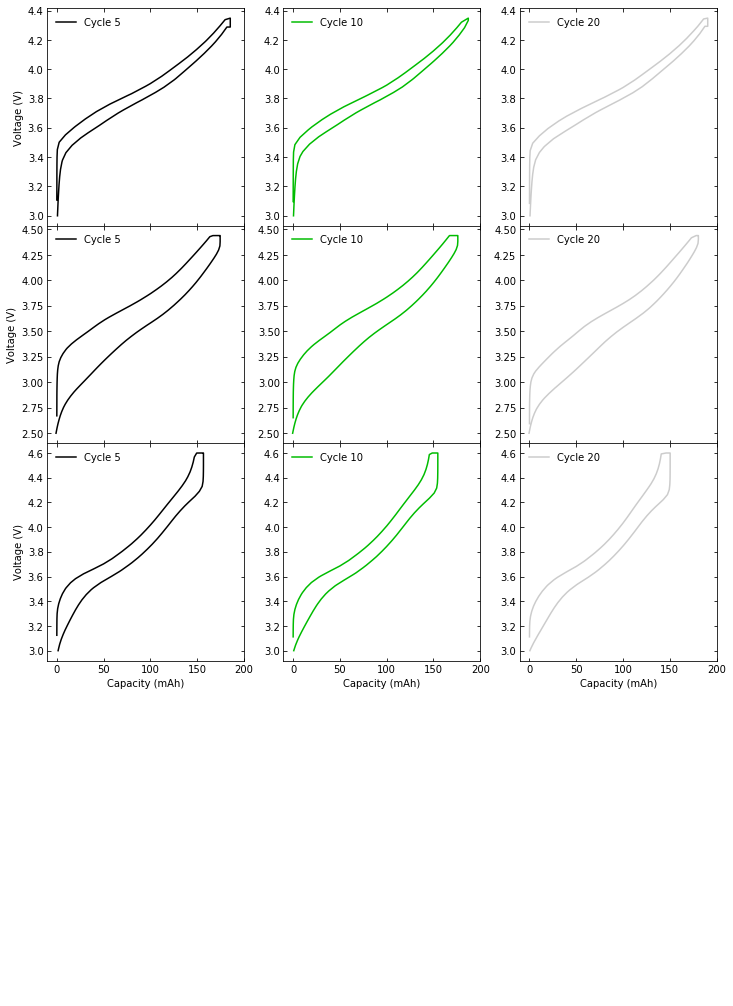

In [81]:
codes = ['104481', '104899', '141764']
path = '/home/mmemc/projects/expt/volt_curves_from_neware'
flist = []
for n in codes:
    flist.append(glob('{0}/*{1}*.txt'.format(path, n))[0])
print(flist)
# plt.use('mystyle') to use your own style file
cnums = [5, 10, 20]

fig, axs = plt.subplots(nrows=len(codes), ncols=len(cnums), sharex=True,
                        figsize=(4*len(cnums),4*len(codes)), gridspec_kw={'hspace':0.0})
print(np.shape(axs))
# if ncols=2, then you call axs like so:
# axs[0,1].plot() 
colors = plt.get_cmap('nipy_spectral')(np.linspace(0,1,len(cnums)))

for i in range(len(flist)):
    nd = ParseNeware(flist[i])
    for j in range(len(cnums)):
        cycnum = cnums[j]  # cycle number to get
        #rec = nd.rec
        #cycle = rec.loc[rec['Cycle_ID'] == cycnum]
        #stepnums = cycle['Step_ID'].unique()    # gets step numbers for chg / dchg of cycle cycnum
        #print(stepnums)

        #chg = cycle.loc[cycle['Step_ID'] == stepnums[0]]   # charge data
        #Vchg = chg['Voltage'].values
        #Cchg = chg['Capacity'].values
        #print(np.shape(Vchg), np.shape(Cchg))

        #dchg = cycle.loc[cycle['Step_ID'] == stepnums[1]]    # discharge data
        #Vdchg = dchg['Voltage'].values
        #Cdchg = dchg['Capacity'].values
        #print(np.shape(Vdchg), np.shape(Cdchg))

        # Combine charge and discharge into a cycle
        #Ccyc = np.concatenate((Cchg, -Cdchg+Cchg[-1]))
        #Vcyc = np.concatenate((Vchg, Vdchg))
        
        V, Cap = nd.get_cycle(cycnum=cycnum)
        
        axs[i,j].plot(Cap, V, color=colors[j], label='Cycle {}'.format(cycnum))
        axs[i,j].tick_params(direction='in', top=True, right=True)
        axs[i,j].legend(frameon=False)
        axs[i,j].annotate(codes[i], (0.7, 0.2))

for j in range(len(codes)):
    axs[j,0].set_ylabel('Voltage (V)')
for i in range(len(cnums)):
    axs[-1,i].set_xlabel('Capacity (mAh)')

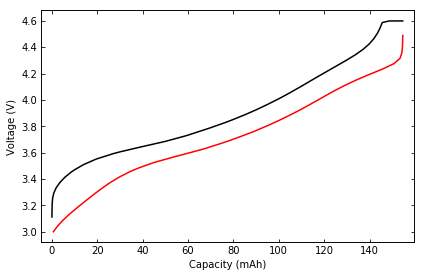

In [16]:
# Plot it, inverting discharge capacity axis to line up with end of charge
fig, ax1 = plt.subplots()

ax1.set_ylabel('Voltage (V)')
ax1.set_xlabel('Capacity (mAh)')
ax1.plot(Cchg, Vchg, color='k')
ax1.set_xlim(-5, Cchg[-1]+5)

ax2 = ax1.twiny()

ax2.set_xlim(Cchg[-1]+5, -5)
ax2.set_xticks([])
ax2.plot(Cdchg, Vdchg, color='r')

fig.tight_layout()
ax1.tick_params(direction='in', top=True, right=True)